In [1]:
from cmath import log
import os
import matplotlib.pyplot as plt

with open('../Downloads/trace.log', 'r') as f:
    log_lines = f.readlines()

print(len(log_lines))

45136252


In [2]:
import numpy as np
VIEW_NUM = int(1e7)

logs = log_lines[:VIEW_NUM]
for i in range(VIEW_NUM):
    temp = logs[i].strip().split()
    logs[i] = [int(x) for x in temp]
# logs = np.array(logs).T
del log_lines

In [3]:
groups = {}
for log_item in logs:
    source_node_id, pulse_id, emit_time, rece_time, num_hops = log_item
    if source_node_id not in groups.keys():
        groups[source_node_id] = []
    groups[source_node_id].append(log_item)
for k in groups.keys():
    groups[k] = np.array(groups[k])
    print(groups[k][:10])


[[                4               101  9301432084211090 47816110312853897
                 14]
 [                4               102  9301432185116514 47816110404046891
                 14]
 [                4               103  9301432285128056 47816110504012377
                 14]
 [                4               104  9301432385067851 47816110603955374
                 14]
 [                4               105  9301432484259832 47816110701988403
                 14]
 [                4               106  9301432584211007 47816110803781023
                 14]
 [                4               107  9301432686071363 47816110903830738
                 14]
 [                4               108  9301432785116599 47816111004011267
                 14]
 [                4               109  9301432884258368 47816111104050086
                 14]
 [                4               110  9301432985067787 47816111204079827
                 14]]
[[                9                70  8410851650

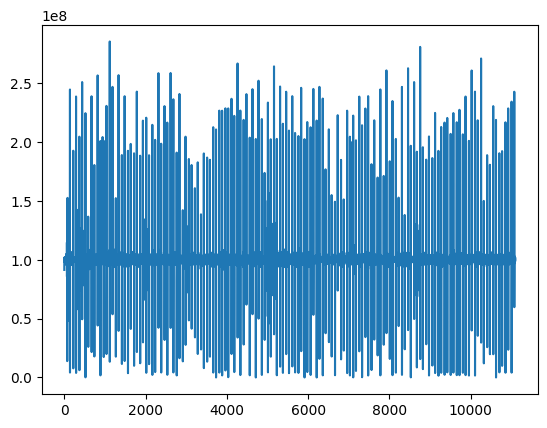

(11096,) (1025, 22)


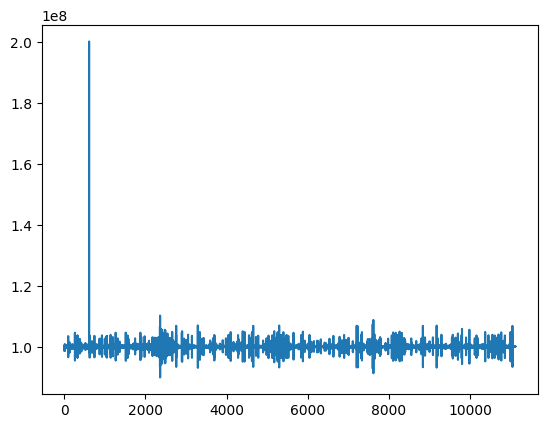

(11120,) (1025, 22)


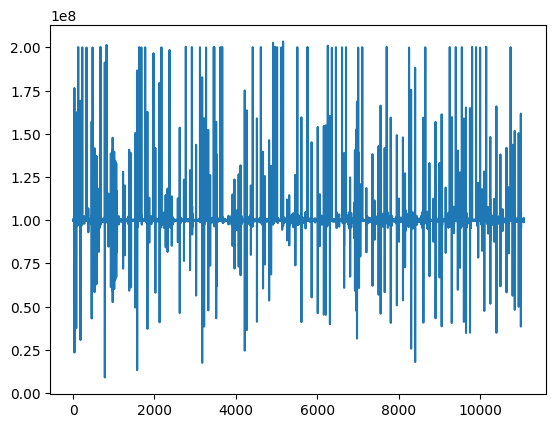

(11074,) (1025, 22)


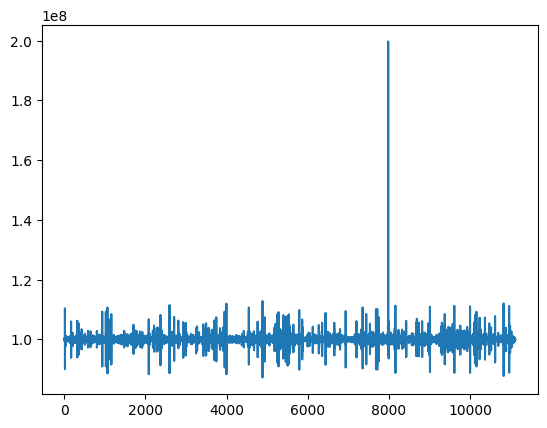

(11120,) (1025, 22)


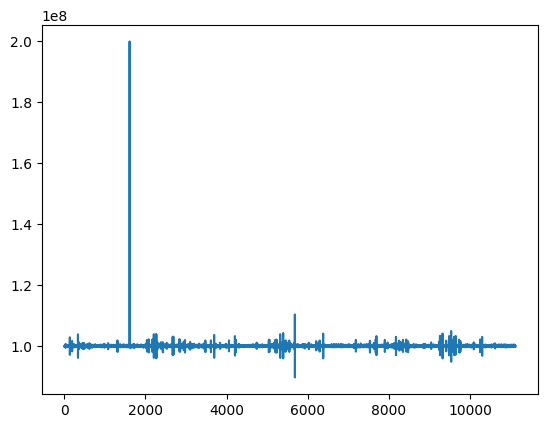

(11120,) (1025, 22)


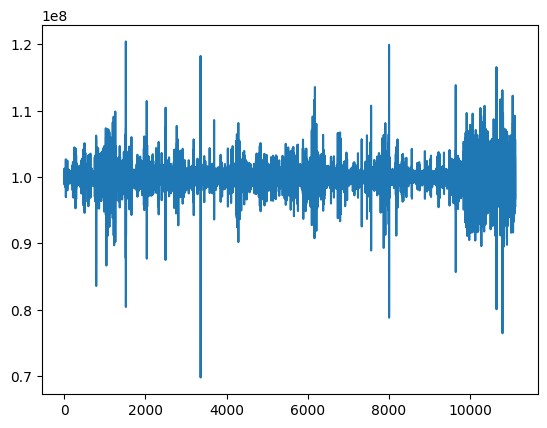

(11120,) (1025, 22)


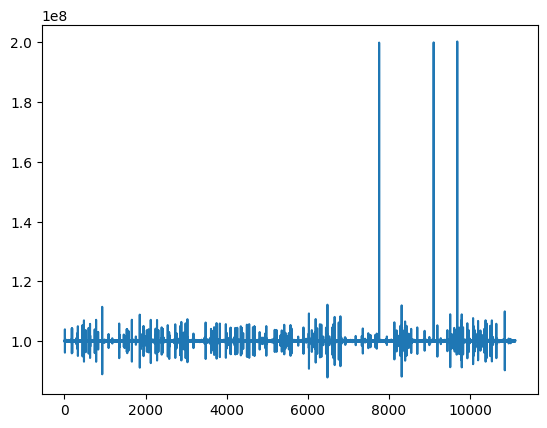

(11118,) (1025, 22)


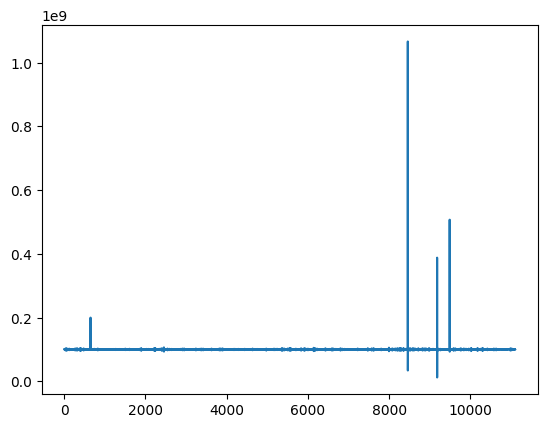

(11104,) (1025, 22)


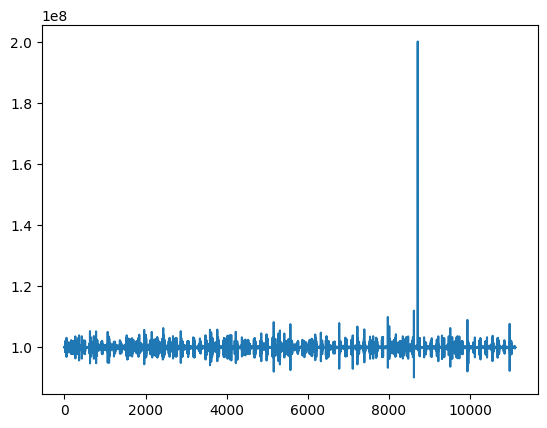

(11119,) (1025, 22)


'    plt.imshow(S)\n    plt.show()\n    plt.close()'

In [9]:
import librosa
from librosa import display
for k in groups.keys():
    rece_times = groups[k][:, 3]
    deltas = rece_times[1:] - rece_times[:-1]
    plt.plot(deltas)
    plt.show()
    plt.close()

    series = np.array(deltas, dtype=float) / 1e8
    S = np.abs(librosa.stft(series))
    print(series.shape, S.shape)
"""    plt.imshow(S)
    plt.show()
    plt.close()"""